<a href="https://colab.research.google.com/github/brach22/MachineLearning340/blob/main/Copy_of_FashionMNISTChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classification Challenge

CSC/DSC 340 Week 10 & 11 Combined Assignment

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: October 21, 2023

Last Modified: October 21, 2023


The goal of this assignment is to create the most accurate classifier you can for the "Fashion MNIST" data set, which is imported below.

Rules:
1. You can train your model with as much of the training data set as you want, but you must report your test accuracy using the entire test data set
2. You cannot use the test data set in your training or validation data sets
3. You accuracy must be reported as the average and standard deviation of five different trainings **AND** must be reproducible

**Deadlines:**
* An update is due before class on October 30. This update must contain your group member names, your current average accuracy, and your current best model architecture. Submit this report as a Word document.
* Your final code is due on November 8 before the start of class.

**EDIT THIS CELL BEFORE TURNING IN THE NOTEBOOK**

Average Accuracy of Best Model:

Standard Deviation of Best Model:

Summary of Best Model:

# Importing Dataset
- from tensorflow

In [31]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tensorflow
from tensorflow.keras import layers, models

# Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy.ndimage

# Different Architectures
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical


In [32]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

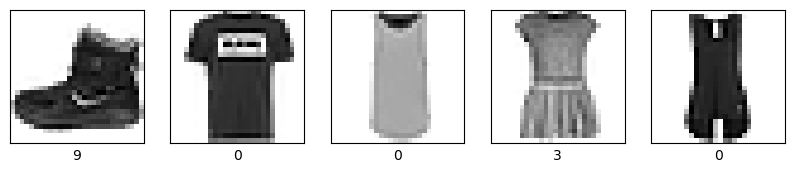

In [33]:
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Shorten Training Set
Reduce size for Runtime

Check for class imbalances using histogram

(28, 28) --> pixels (image size)

10 classes


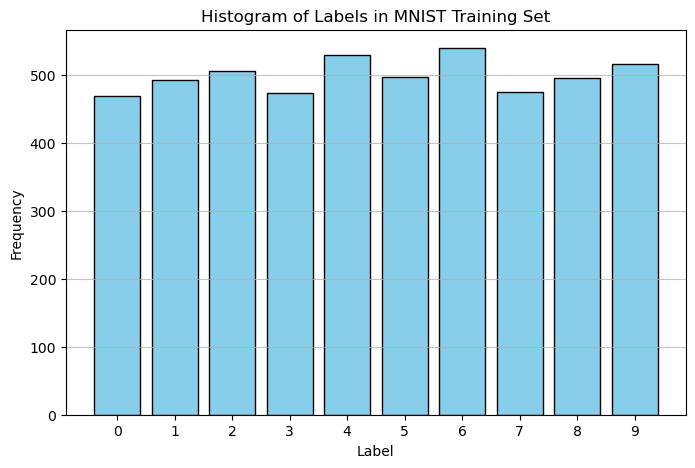

In [34]:
random_indices = np.random.choice(60000, 5000, replace=False)
train_images_smaller = train_images[random_indices]
train_labels_smaller = train_labels[random_indices]

# Create a histogram of the labels
plt.figure(figsize=(8, 5))
plt.hist(train_labels_smaller, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Histogram of Labels in MNIST Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Adding Pre-Processing

Data augmentation
- Image moving stuff
- Coloring techniques

Testing models with Pre-Processing after preliminary

In [28]:
# Data gen

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(train_images)

# NEED DATAGEN FITTING

# Training with datagen
#model.fit(datagen.flow(train_images, train_labels, batch_size=32),
#          steps_per_epoch=len(train_images) / 32, epochs=5)

In [23]:
# Coloring

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def remove_gray_images(images, threshold=5):
    images_redone = []
    for image in images:
        for i in range(28):
            for j in range(28):
                if image[i][j] < 255-threshold:
                    image[i][j] = 0
        images_redone.append(image)
    images_redone = np.asarray(images_redone)
    return images_redone

# Remove gray images from the training set
train_images_filtered = remove_gray_images(train_images, 55) # 55 is the number for blackness rating of pixels

# Remove gray images from the test set
test_images_filtered = remove_gray_images(test_images, 55)

ValueError: assignment destination is read-only

In [ ]:
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_filtered[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

x_train_filtered = train_images_filtered / 255
x_test_filtered = test_images_filtered / 255

# Model 1

In [13]:
# Build Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
#model.fit(train_images, train_labels, epochs=5, verbose=1)

# Training with datagen
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          steps_per_epoch=len(train_images) / 32, epochs=5)

# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


2023-11-07 23:10:35.640417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-11-07 23:10:35.678160: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 26s 14ms/step - loss: 0.7076 - accuracy: 0.7329
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5009 - accuracy: 0.8089
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4306 - accuracy: 0.8362
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3976 - accuracy: 0.8502
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3746 - accuracy: 0.8588
313/313 - 1s - loss: 0.4226 - accuracy: 0.8447 - 1s/epoch - 5ms/step

Test accuracy: 0.8446999788284302


RUN.........Accuracy

1...........0.899

2...........0.898

3...........0.891

4...........0.910

5...........0.899

Average Accuracy = 0.8994
Stn Dev Accuracy = 0.006

## Confusion Matrix

313/313 [==============================] - 2s 5ms/step


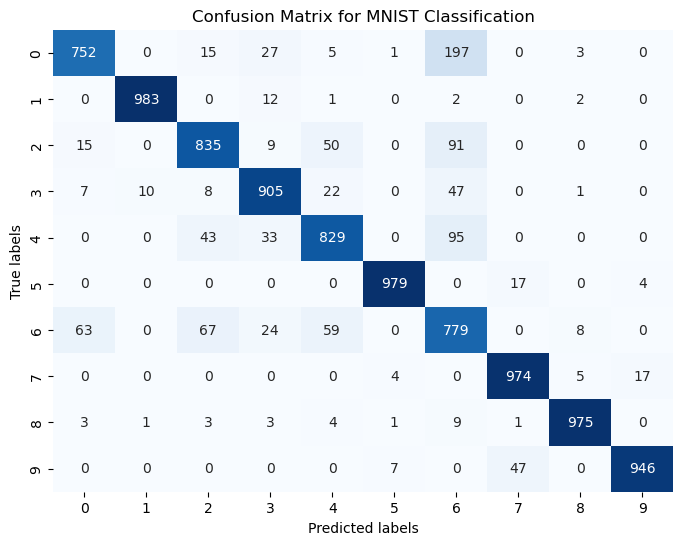

In [6]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

# Model 2

## Model and Compiling

In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
#model.fit(train_images, train_labels, epochs=5, verbose=1)

# Training with datagen
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          steps_per_epoch=len(train_images) / 32, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


2023-11-07 23:13:00.790872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1875/1875 [==============================] - 25s 13ms/step - loss: 0.7306 - accuracy: 0.7202
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5294 - accuracy: 0.7967
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4654 - accuracy: 0.8213
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4218 - accuracy: 0.8390
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3987 - accuracy: 0.8483
313/313 - 1s - loss: 0.3235 - accuracy: 0.8805 - 1s/epoch - 5ms/step

Test accuracy: 0.8805000185966492


RUN.........ACCURACY

1...........0.901

2...........0.896

3...........0.895

4...........0.899

5...........0.888

Average Accuracy = 0.896
Stn Dev Accuracy = 0.004

## Confusion Matrix

313/313 [==============================] - 1s 4ms/step


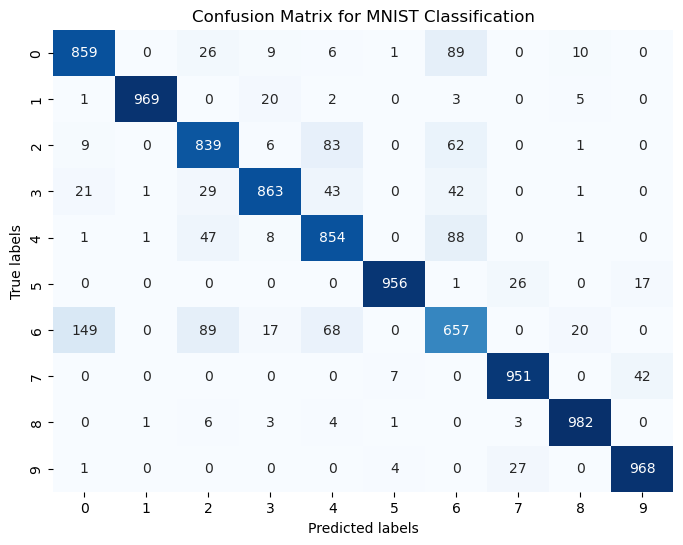

In [8]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

# Model 3

In [38]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, verbose=1) # change EPOCHS TO 10

# Training with datagen
#model.fit(datagen.flow(train_images, train_labels, batch_size=32),
#          steps_per_epoch=len(train_images) / 32, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/12
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5214 - accuracy: 0.8092
Epoch 2/12
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3341 - accuracy: 0.8789
Epoch 3/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2844 - accuracy: 0.8947
Epoch 4/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2563 - accuracy: 0.9055
Epoch 5/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2294 - accuracy: 0.9144
Epoch 6/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2111 - accuracy: 0.9208
Epoch 7/12
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1923 - accuracy: 0.9290
Epoch 8/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1800 - accuracy: 0.9318
Epoch 9/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1639 - accuracy: 0.9381
Epoch 10/12
1875/1875 [==============================] - 40s 21m

RUN.........ACCURACY

1...........0.907

2...........0.911

3...........0.904

4...........0.910

5...........0.917

Average Accuracy = 0.9098
Stn Dev Accuracy = 0.004

## Confusion Matrix

313/313 [==============================] - 3s 10ms/step


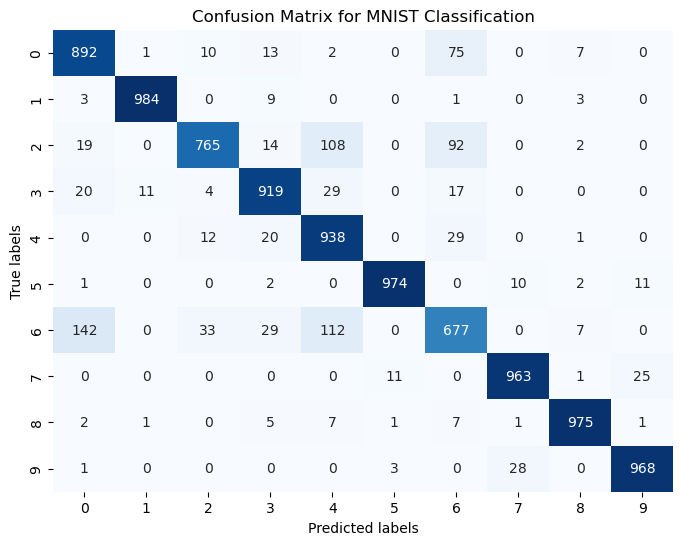

In [10]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

# Model 4
Model 3 but removing post-processing

In [37]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = np.expand_dims(x_train, axis=-1) / 255.0
x_test = np.expand_dims(x_test, axis=-1) / 255.0

# Create a CNN model with regularization and dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

del x_train
del x_test


Epoch 1/15
469/469 [==============================] - 22s 46ms/step - loss: 1.1454 - accuracy: 0.7355 - val_loss: 0.7952 - val_accuracy: 0.7993
Epoch 2/15
469/469 [==============================] - 21s 46ms/step - loss: 0.8348 - accuracy: 0.7851 - val_loss: 0.7418 - val_accuracy: 0.8098
Epoch 3/15
469/469 [==============================] - 22s 46ms/step - loss: 0.7852 - accuracy: 0.7962 - val_loss: 0.7133 - val_accuracy: 0.8262
Epoch 4/15
469/469 [==============================] - 21s 45ms/step - loss: 0.7578 - accuracy: 0.8044 - val_loss: 0.6702 - val_accuracy: 0.8349
Epoch 5/15
469/469 [==============================] - 21s 44ms/step - loss: 0.7361 - accuracy: 0.8102 - val_loss: 0.6872 - val_accuracy: 0.8356
Epoch 6/15
469/469 [==============================] - 21s 44ms/step - loss: 0.7265 - accuracy: 0.8091 - val_loss: 0.6504 - val_accuracy: 0.8306
Epoch 7/15
469/469 [==============================] - 21s 44ms/step - loss: 0.7111 - accuracy: 0.8148 - val_loss: 0.6421 - val_accuracy:

## Confusion Matrix

313/313 [==============================] - 3s 8ms/step


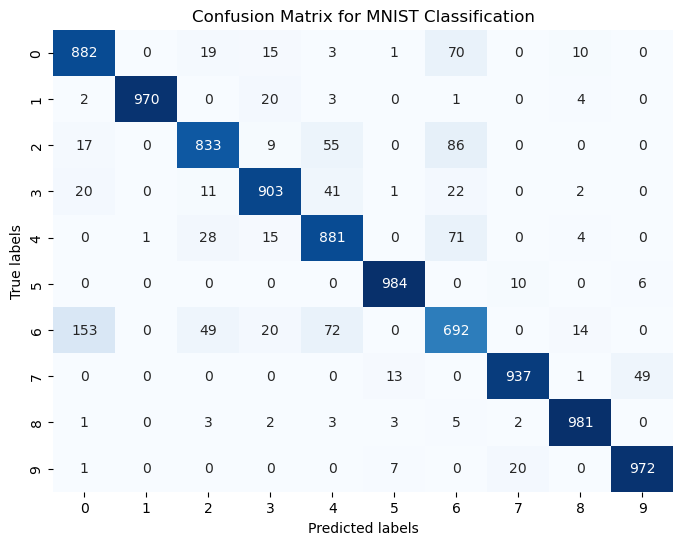

In [31]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

RUN.........ACCURACY

1...........

2...........

3...........

4...........

5...........

Average Accuracy = 
Stn Dev Accuracy = 